# THE SPARK FOUNDATION INTERNSHIP
# #Task 1: To predict the percentage of student based on the number of study hours.
#### Author: M. Harish Babu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline

In [3]:
#importing the dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Dataset successfully imported")

Dataset successfully imported


In [8]:
#displaying the first 10 rows of the dataset
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
#getting the summary of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualising the Data

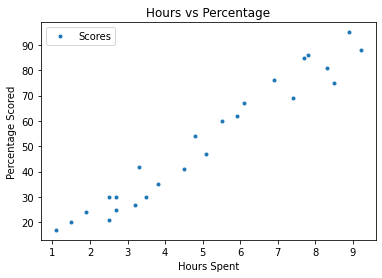

In [13]:
#plotting score distribution 
data.plot(x="Hours",y="Scores",style=".")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Spent")
plt.ylabel("Percentage Scored")
plt.show()

# Preparing the data

In [14]:
#preparing X and Y as attributes and labels respectively
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

# Splitting datasets

In [15]:
#splitting into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [16]:
#linear regression using scikit-learn
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("Training successfully completed")

Training successfully completed


In [17]:
print("Coefficient is :", regressor.coef_)
print("Intercept is :", regressor.intercept_)

Coefficient is : [9.68207815]
Intercept is : 2.826892353899737


In [18]:
#Plotting regression line
line = regressor.coef_*X + regressor.intercept_

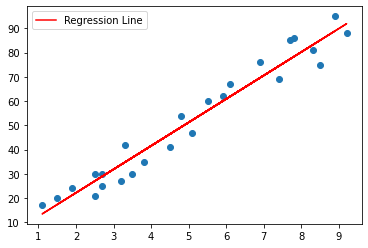

In [20]:
#plotting for test data
plt.scatter(X, Y)
plt.plot(X, line, color = "red", label = "Regression Line")
plt.legend()
plt.show()

# Predictions

In [21]:
print(X_test)
Y_pred = regressor.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [22]:
#Comparing actual vs predicted values
df=pd.DataFrame({'Actual values' : Y_test, 'Predicted values' : Y_pred})
df

,Actual values,Predicted values
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [23]:
#Estimation of train and test scores
print("Training score is :",regressor.score(X_train, Y_train))
print("Test score is :",regressor.score(X_test, Y_test))

Training score is : 0.9491209376364416
Test score is : 0.9678055545167994


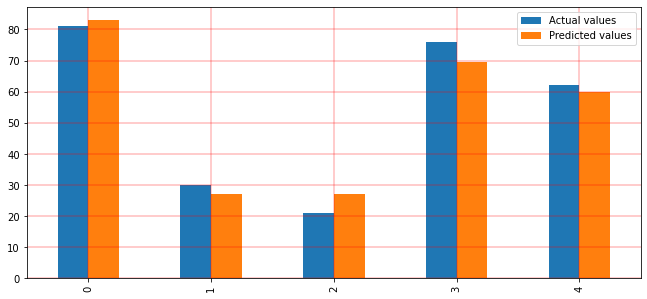

In [27]:
#plotting actual vs predicted
df.plot(kind = 'bar', figsize = (11,5))
plt.grid(which = 'major', linewidth = '0.4', color = 'yellow')
plt.grid(which = 'major', linewidth = '0.4', color = 'red')
plt.show()

# Predicting with new data

In [29]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("Number of hours taken is : {}".format(hours))
print("Predicted score is : {}".format(own_pred[0]))

Number of hours taken is : 9.25
Predicted score is : 92.38611528261494


# Model Evaluation 

In [30]:
print("Mean Absolute Error is :", metrics.mean_absolute_error(Y_test,Y_pred))
print("Mean Squared Error is :", metrics.mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error is :", np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print("R-2 is :", metrics.r2_score(Y_test,Y_pred))

Mean Absolute Error is : 3.9207511902099244
Mean Squared Error is : 18.943211722315272
Root Mean Squared Error is : 4.352380006653288
R-2 is : 0.9678055545167994


# Conclusion: We can see the value of the root mean squared error is 4.509 and the mean value of the percentages of all the students is 51.48 (from the statistical details obtained in cell no. 5). Here root mean squared error is less than 10% of the mean value of the percenttages of all the student scores. Hence, it is safe to conclue the model did a decent job to predict the the student score as 93.89 % when student studies for 9.25 hours.